In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
style.use("ggplot")

In [6]:
df = pd.read_excel ('superstore.xls')

In [7]:
print(df.head(5))

   Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
1       2  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
2       3  CA-2016-138688 2016-06-12 2016-06-16    Second Class    DV-13045   
3       4  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
4       5  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   South  FUR-BO-10

In [8]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [9]:
column_list = list(df.columns)
for col in column_list[17:]:
    print(df[col].describe())
    print("\n")

count     9994.000000
mean       229.858001
std        623.245101
min          0.444000
25%         17.280000
50%         54.490000
75%        209.940000
max      22638.480000
Name: Sales, dtype: float64


count    9994.000000
mean        3.789574
std         2.225110
min         1.000000
25%         2.000000
50%         3.000000
75%         5.000000
max        14.000000
Name: Quantity, dtype: float64


count    9994.000000
mean        0.156203
std         0.206452
min         0.000000
25%         0.000000
50%         0.200000
75%         0.200000
max         0.800000
Name: Discount, dtype: float64


count    9994.000000
mean       28.656896
std       234.260108
min     -6599.978000
25%         1.728750
50%         8.666500
75%        29.364000
max      8399.976000
Name: Profit, dtype: float64




In [11]:
df.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [12]:
import datetime as dt
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [13]:
price_per_unit = df["Sales"] / df["Quantity"]
df["Price/Unit"] = price_per_unit

In [14]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Price/Unit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,130.9800
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,243.9800
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,7.3100
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,191.5155
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,11.1840


In [15]:
df['month_year'] = df['Order Date'].dt.to_period('M')

In [16]:
monthly_revenue = pd.DataFrame(df.groupby(df['month_year'].dt.strftime('%Y : %B'))['Sales'].sum())
monthly_revenue

,Sales
month_year,
2014 : April,28295.3450
2014 : August,27909.4685
2014 : December,69545.6205
2014 : February,4519.8920
2014 : January,14236.8950
2014 : July,33946.3930
2014 : June,34595.1276
2014 : March,55691.0090
2014 : May,23648.2870


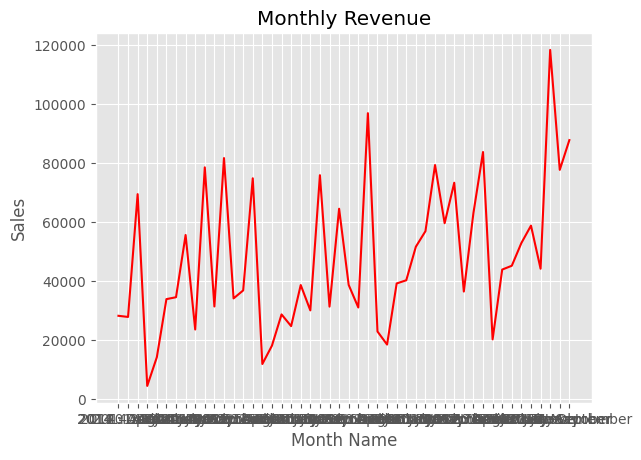

In [17]:
plt.title('Monthly Revenue')
plt.xlabel('Month Name')
plt.ylabel('Sales')
plt.plot(monthly_revenue, 'r')
plt.show()

In [19]:
monthly_revenue.describe()

,Sales
count,48.000000
mean,47858.351256
std,25195.890700
min,4519.892000
25%,29790.096125
50%,39803.248500
75%,65833.343625
max,118447.825000


In [21]:
yearly_revenue = pd.DataFrame(df.groupby(df['month_year'].dt.strftime('%Y'))['Sales'].sum())
yearly_revenue

,Sales
month_year,
2014,484247.4981
2015,470532.5090
2016,609205.5980
2017,733215.2552


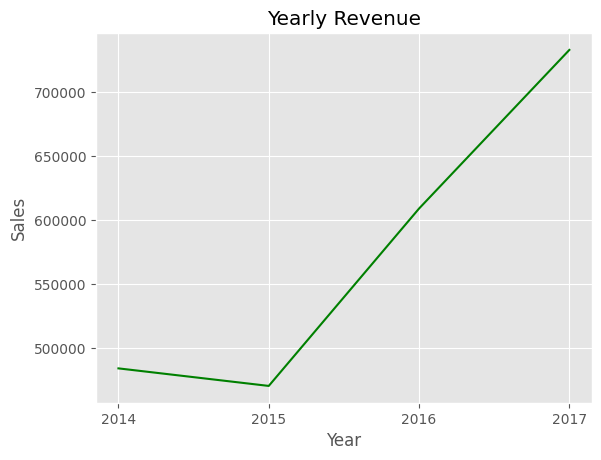

In [22]:
plt.title('Yearly Revenue')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.plot(yearly_revenue, 'g')
plt.show()

In [23]:
yearly_revenue.describe()

,Sales
count,4.000000
mean,574300.215075
std,122949.318005
min,470532.509000
25%,480818.750825
50%,546726.548050
75%,640208.012300
max,733215.255200


In [26]:
monthly_revenue["Monthly Growth Rate"]=(monthly_revenue['Sales']-monthly_revenue['Sales'].shift())/monthly_revenue['Sales'].shift()*100
monthly_revenue

,Sales,Monthly Growth Rate
month_year,,
2014 : April,28295.3450,NaN
2014 : August,27909.4685,-1.363746
2014 : December,69545.6205,149.182891
2014 : February,4519.8920,-93.500824
2014 : January,14236.8950,214.983079
2014 : July,33946.3930,138.439583
2014 : June,34595.1276,1.911056
2014 : March,55691.0090,60.979343
2014 : May,23648.2870,-57.536616


In [27]:
print(np.max(monthly_revenue['Monthly Growth Rate']))

232.4922295640272


In [29]:
monthly_revenue.loc[monthly_revenue['Monthly Growth Rate'] == 232.4922295640271]

,Sales,Monthly Growth Rate
month_year,,


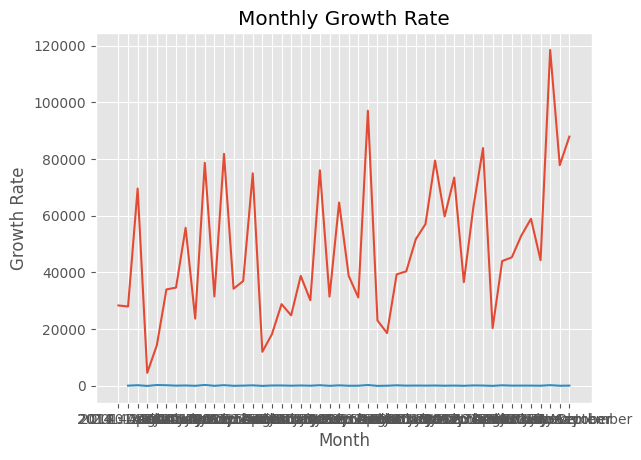

In [31]:
plt.title('Monthly Growth Rate')
plt.xlabel('Month')
plt.ylabel('Growth Rate')
plt.plot(monthly_revenue)

In [33]:
monthly_revenue.describe()

,Sales,Monthly Growth Rate
count,48.000000,47.000000
mean,47858.351256,32.755629
std,25195.890700,85.070021
min,4519.892000,-93.500824
25%,29790.096125,-24.828179
50%,39803.248500,11.118224
75%,65833.343625,87.937537
max,118447.825000,232.492230


Finding out the most and least sold product id    

In [34]:
product_id_df = pd.DataFrame(df.groupby(df["Product ID"])["Quantity"].sum())
product_id_df

,Quantity
Product ID,
FUR-BO-10000112,9
FUR-BO-10000330,10
FUR-BO-10000362,14
FUR-BO-10000468,21
FUR-BO-10000711,12
...,...
TEC-PH-10004912,11
TEC-PH-10004922,19
TEC-PH-10004924,8


In [35]:
print(np.max(product_id_df["Quantity"]))

75


In [37]:
product_id_df.loc[product_id_df['Quantity'] == 75]

,Quantity
Product ID,
TEC-AC-10003832,75


Finding out the customer who bought most and least from us in terms of quantity

In [38]:
customer_name_df = pd.DataFrame(df.groupby(df["Customer Name"])["Quantity"].sum())
customer_name_df

,Quantity
Customer Name,
Aaron Bergman,13
Aaron Hawkins,54
Aaron Smayling,48
Adam Bellavance,56
Adam Hart,75
...,...
Xylona Preis,100
Yana Sorensen,58
Yoseph Carroll,31


In [39]:
print(np.max(customer_name_df["Quantity"]))

150


In [41]:
customer_name_df.loc[customer_name_df['Quantity'] == 150]

,Quantity
Customer Name,
Jonathan Doherty,150



Finding out the customer who bought most and least from us in terms of value

In [42]:
customer_by_value = pd.DataFrame(df.groupby(df["Customer Name"])["Sales"].sum())
customer_by_value

,Sales
Customer Name,
Aaron Bergman,886.156
Aaron Hawkins,1744.700
Aaron Smayling,3050.692
Adam Bellavance,7755.620
Adam Hart,3250.337
...,...
Xylona Preis,2374.658
Yana Sorensen,6720.444
Yoseph Carroll,5454.350


In [43]:
print(np.max(customer_by_value["Sales"]))

25043.05


In [44]:
customer_by_value.loc[customer_by_value['Sales'] == 25043.05]

,Sales
Customer Name,
Sean Miller,25043.05


Finding out the majority and minority customer cities on basis of
Number of customers

In [45]:
city_customer_group=df.groupby("City").count()['Customer Name']
city_customer_group = pd.DataFrame(city_customer_group)
city_customer_group['Customer Count'] = city_customer_group['Customer Name']
city_customer_group.drop('Customer Name',  axis='columns', inplace=True)
city_customer_group

,Customer Count
City,
Aberdeen,1
Abilene,1
Akron,21
Albuquerque,14
Alexandria,16
...,...
Woonsocket,4
Yonkers,15
York,5


In [46]:
print(np.max(city_customer_group["Customer Count"]))

915


In [47]:
city_customer_group.loc[city_customer_group['Customer Count'] == 915]

,Customer Count
City,
New York City,915


In [48]:
print(np.min(city_customer_group["Customer Count"]))

1


In [49]:
city_customer_group.loc[city_customer_group['Customer Count'] == 1]

,Customer Count
City,
Aberdeen,1
Abilene,1
Antioch,1
Arlington Heights,1
Atlantic City,1
...,...
Vacaville,1
Waterloo,1
Waukesha,1


In [50]:
city_by_sale = pd.DataFrame(df.groupby(df["City"])["Sales"].sum())
city_by_sale

,Sales
City,
Aberdeen,25.500
Abilene,1.392
Akron,2729.986
Albuquerque,2220.160
Alexandria,5519.570
...,...
Woonsocket,195.550
Yonkers,7657.666
York,817.978


In [52]:
print(np.max(city_by_sale["Sales"]))

256368.161


In [53]:
city_by_sale.loc[city_by_sale['Sales'] == 256368.161]

,Sales
City,
New York City,256368.161


In [54]:
print(np.min(city_by_sale["Sales"]))

1.3919999999999997


In [55]:
city_by_sale.loc[city_by_sale['Sales'] == 1.3919999999999997]

,Sales
City,
Abilene,1.392


Number of Quantity Sold

In [56]:
city_by_quantity = pd.DataFrame(df.groupby(df["City"])["Quantity"].sum())
city_by_quantity

,Quantity
City,
Aberdeen,3
Abilene,2
Akron,65
Albuquerque,65
Alexandria,84
...,...
Woonsocket,15
Yonkers,57
York,19


In [57]:
print(np.max(city_by_quantity["Quantity"]))

3417


In [58]:
city_by_quantity.loc[city_by_quantity['Quantity'] == 3417]

,Quantity
City,
New York City,3417


In [59]:
print(np.min(city_by_quantity["Quantity"]))

1


In [60]:
city_by_quantity.loc[city_by_quantity['Quantity'] == 1]

,Quantity
City,
Elyria,1
Iowa City,1
Jupiter,1
Lindenhurst,1
Littleton,1
Port Orange,1


Find out the most and least sold product category from the store
Quantity based

In [61]:
product_category_by_quantity = pd.DataFrame(df.groupby(df["Category"])["Quantity"].sum())
product_category_by_quantity

,Quantity
Category,
Furniture,8028
Office Supplies,22906
Technology,6939


In [62]:
print(np.max(product_category_by_quantity["Quantity"]))


22906


In [63]:
product_category_by_quantity.loc[product_category_by_quantity['Quantity'] == 22906]

,Quantity
Category,
Office Supplies,22906


In [64]:
print(np.min(product_category_by_quantity["Quantity"]))

6939


In [65]:
product_category_by_quantity.loc[product_category_by_quantity['Quantity'] == 6939]

,Quantity
Category,
Technology,6939



Value based

In [66]:
product_category_by_value = pd.DataFrame(df.groupby(df["Category"])["Sales"].sum())
product_category_by_value

,Sales
Category,
Furniture,741999.7953
Office Supplies,719047.0320
Technology,836154.0330


In [67]:
print(np.max(product_category_by_value["Sales"]))

836154.033


In [68]:
product_category_by_value.loc[product_category_by_value['Sales'] == 836154.0329999966]

,Sales
Category,


In [69]:
print(np.min(product_category_by_value["Sales"]))

719047.032


In [71]:
product_category_by_value.loc[product_category_by_value['Sales'] == 719047.0320000029]

,Sales
Category,


Find out the most and least sold product sub category from the store
By Quantity

In [72]:
subcat_by_quantity = pd.DataFrame(df.groupby(df["Sub-Category"])["Quantity"].sum())
subcat_by_quantity

,Quantity
Sub-Category,
Accessories,2976
Appliances,1729
Art,3000
Binders,5974
Bookcases,868
Chairs,2356
Copiers,234
Envelopes,906
Fasteners,914


In [73]:
print(np.max(subcat_by_quantity["Quantity"]))

5974


In [74]:
subcat_by_quantity.loc[subcat_by_quantity['Quantity'] == 5974]

,Quantity
Sub-Category,
Binders,5974


In [75]:
print(np.min(subcat_by_quantity["Quantity"]))

234


In [76]:
subcat_by_quantity.loc[subcat_by_quantity['Quantity'] == 234]

,Quantity
Sub-Category,
Copiers,234



By Value

In [77]:
subcat_by_value = pd.DataFrame(df.groupby(df["Sub-Category"])["Sales"].sum())
subcat_by_value

,Sales
Sub-Category,
Accessories,167380.3180
Appliances,107532.1610
Art,27118.7920
Binders,203412.7330
Bookcases,114879.9963
Chairs,328449.1030
Copiers,149528.0300
Envelopes,16476.4020
Fasteners,3024.2800


In [78]:
print(np.max(subcat_by_value["Sales"]))

330007.054


In [79]:
subcat_by_value.loc[subcat_by_value['Sales'] == 330007.0540000001]

,Sales
Sub-Category,


In [80]:
print(np.min(subcat_by_value["Sales"]))

3024.28


In [82]:
subcat_by_value.loc[subcat_by_value['Sales'] == 3024.2799999999997]

,Sales
Sub-Category,
